In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Datasets/new.csv')

In [4]:
df.isnull().sum()

A1_Score     0
A2_Score     0
A3_Score     0
A4_Score     0
A5_Score     0
A6_Score     0
A7_Score     0
A8_Score     0
A9_Score     0
A10_Score    0
age          0
gender       0
jaundice     0
autism       0
relation     0
Class        0
dtype: int64

In [17]:
df['Class'].value_counts()

0    515
1    189
Name: Class, dtype: int64

([<matplotlib.patches.Wedge at 0x250131f4310>,
 [Text(-0.7314111852459795, 0.8216067660974268, 'NO'),
  Text(0.7314111083215993, -0.8216068345770805, 'YES')],
 [Text(-0.39895155558871603, 0.4481491451440509, '73.2%'),
  Text(0.3989515136299632, -0.4481491824965893, '26.8%')])

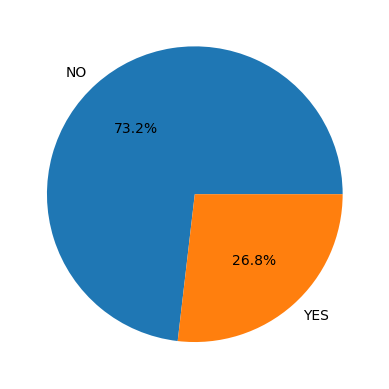

In [19]:
plt.pie(df['Class'].value_counts(),labels=['NO','YES'],autopct='%1.1f%%')

<Axes: >

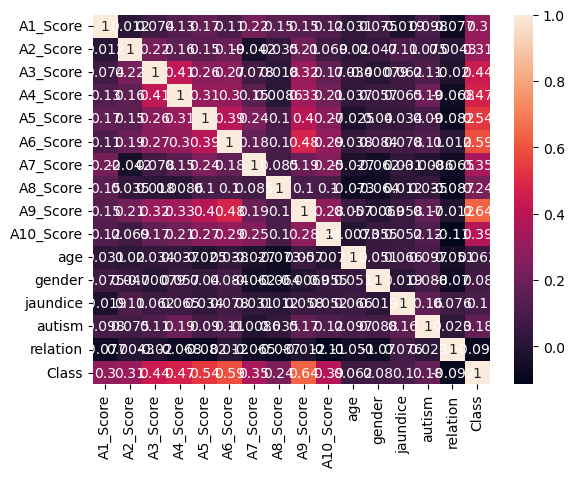

In [6]:
sns.heatmap(df.corr(),annot=True)
#No Correlarted columns

In [42]:
y

0      0
1      0
2      1
3      0
4      0
      ..
699    1
700    0
701    1
702    0
703    1
Name: Class, Length: 704, dtype: int64

In [9]:
y=df['Class']
X = df.copy()
X.drop('Class',axis = 1,inplace  = True)

In [10]:
X

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jaundice,autism,relation
0,1,1,1,1,0,0,1,1,0,0,26,1,0,0,0
1,1,1,0,1,0,0,0,1,0,1,24,0,0,1,0
2,1,1,0,1,1,0,1,1,1,1,27,0,1,1,1
3,1,1,0,1,0,0,1,1,0,1,35,1,0,1,0
4,1,0,0,0,0,0,0,1,0,0,40,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,25,1,0,0,0
700,1,0,0,0,0,0,0,1,0,1,34,0,0,0,1
701,1,0,1,1,1,0,1,1,0,1,24,1,0,0,2
702,1,0,0,1,1,0,1,0,1,1,35,0,0,0,0


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

<IPython.core.display.Javascript object>

In [12]:
X_train

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jaundice,autism,relation
23,0,0,0,0,0,0,0,1,0,1,42,0,1,0,4
15,1,1,0,1,1,0,0,1,0,1,18,0,0,1,1
638,1,1,0,1,1,0,0,1,0,0,18,0,0,0,0
630,1,1,0,1,1,0,1,1,0,0,32,0,0,0,0
281,1,1,1,1,1,0,0,1,1,1,33,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,0,1,1,0,0,0,1,0,0,58,0,0,0,0
106,0,0,1,0,1,1,1,1,0,1,26,0,0,0,0
270,1,0,1,1,1,1,0,0,1,1,22,1,0,1,2
435,0,0,1,1,0,0,0,0,0,0,23,1,0,0,0


In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [22]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled,y_train)

LogisticRegression()

In [23]:
log_reg_pred = log_reg.predict(X_test_scaled)

In [25]:
from sklearn.metrics import accuracy_score
log_reg_acc = accuracy_score(y_test,log_reg_pred)
print(log_reg_acc)

1.0


In [26]:
log_reg_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [28]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train_scaled,y_train)

LinearRegression()

In [33]:
linear_reg_pred = linear.predict(X_test_scaled)
linear_reg_acc = accuracy_score(y_test,linear_reg_pred)
# print(linear_reg_acc)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [43]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier()
random.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [46]:
random_pred = random.predict(X_test_scaled)
random_acc = accuracy_score(y_test,random_pred)
print(random_acc)

0.9785407725321889


In [36]:
X_test

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jaundice,autism,relation
296,1,1,1,1,1,1,0,0,1,1,19,1,1,0,1
81,1,0,0,0,0,0,1,0,0,1,30,0,0,0,2
77,1,1,0,1,1,1,1,1,1,0,33,1,0,1,0
208,1,1,1,1,0,0,1,1,0,0,50,0,0,0,0
318,1,1,1,0,1,0,0,1,0,1,21,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,1,1,1,0,0,0,0,0,0,0,21,1,0,0,0
362,0,0,0,0,1,0,0,1,0,1,20,0,0,0,1
685,1,0,1,1,1,0,0,1,1,1,38,0,0,1,0
468,1,1,1,1,1,1,1,1,1,1,27,1,0,0,0


In [48]:
import pickle
pickle.dump(sc, open('scaler.pkl','wb'))
pickle.dump(random, open('random_forest.pkl','wb'))

<Axes: >

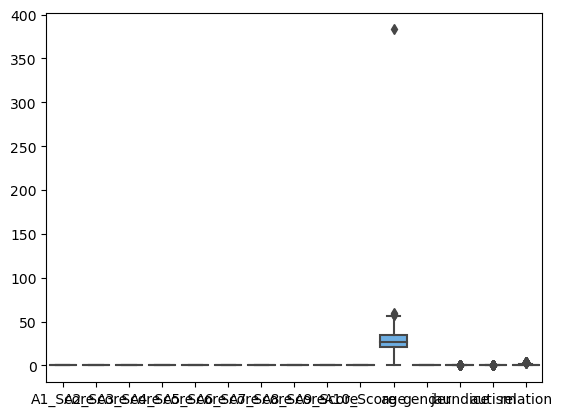

In [49]:
sns.boxplot(X_train)

<Axes: >

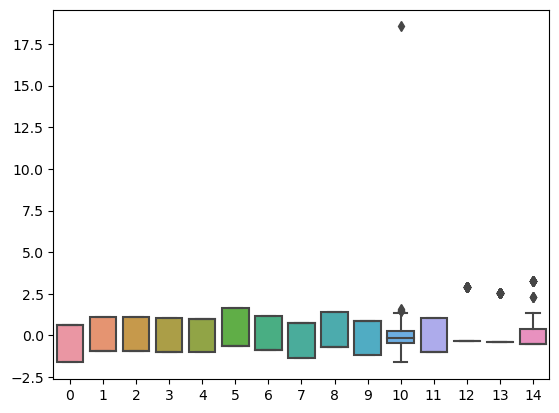

In [50]:
sns.boxplot(X_train_scaled)